In [2]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#file path
csv_path = "../Resources/crimedata_33613_1y.csv"
crime_data_df = pd.read_csv(csv_path)
crime_data_df.head(10)

,OBJECTID,Case Number,Crime Type,Crime Type Extension,Reported Date,Address,zip
0,1211344,2020-95173,THEFT,SHOPLIFTING,02/05/2020,13600 BLOCK UNIVERSITY PZ,33613
1,1211369,2020-93942,DUI,DUI (DRIVING UNDER INFLUENCE),02/05/2020,FLETCHER AV E / USF GENSHAFT DR,33613
2,1211405,2020-94397,DRUGS,DRUGS/NARCOTICS,02/05/2020,15300 BLOCK NEBRASKA AV N,33613
3,1211406,2020-94397,DRUGS,DRUG PARAPHERNALIA,02/05/2020,15300 BLOCK NEBRASKA AV N,33613
4,1211407,2020-94397,FRAUD,FRAUD-OTHER,02/05/2020,15300 BLOCK NEBRASKA AV N,33613
5,1211429,2020-94041,DUI,DUI (DRIVING UNDER INFLUENCE),02/05/2020,13800 BLOCK 20TH ST N,33613
6,1211461,2020-94817,TRAFFIC,Non Incapacitating Injury,02/05/2020,BEARSS AV W / NORTHWOOD VLG LN,33613
7,1211554,2020-94882,FRAUD,FRAUD-OTHER,02/05/2020,15300 BLOCK NEBRASKA AV N,33613
8,1211596,2020-97416,THEFT,THEFT MOTOR VEHICLE PARTS,02/06/2020,14400 BLOCK 19TH ST N,33613
9,1211624,2020-97766,THEFT,PETIT THEFT - ALL OTHER,02/06/2020,14700 BLOCK 42ND ST N,33613


In [3]:
#identify columns names used in the data
crime_data_df.columns

Index(['OBJECTID', 'Case Number', 'Crime Type', 'Crime Type Extension',
       'Reported Date', 'Address', 'zip'],
      dtype='object')

In [4]:
#remove some columns from the data 
reduced_crime_data_df = crime_data_df.loc[:, ['Reported Date', 'Case Number', 'Crime Type', 'Crime Type Extension'
       , 'zip']]
reduced_crime_data_df.head(10)

,Reported Date,Case Number,Crime Type,Crime Type Extension,zip
0,02/05/2020,2020-95173,THEFT,SHOPLIFTING,33613
1,02/05/2020,2020-93942,DUI,DUI (DRIVING UNDER INFLUENCE),33613
2,02/05/2020,2020-94397,DRUGS,DRUGS/NARCOTICS,33613
3,02/05/2020,2020-94397,DRUGS,DRUG PARAPHERNALIA,33613
4,02/05/2020,2020-94397,FRAUD,FRAUD-OTHER,33613
5,02/05/2020,2020-94041,DUI,DUI (DRIVING UNDER INFLUENCE),33613
6,02/05/2020,2020-94817,TRAFFIC,Non Incapacitating Injury,33613
7,02/05/2020,2020-94882,FRAUD,FRAUD-OTHER,33613
8,02/06/2020,2020-97416,THEFT,THEFT MOTOR VEHICLE PARTS,33613
9,02/06/2020,2020-97766,THEFT,PETIT THEFT - ALL OTHER,33613


In [5]:
#columns to use in the table below 
columns = [
    "Reported Date", "Case Number", "Crime Type", "Crime Type Extension", "zip"
]
#create a new DF for non Traffic related crimes
data_crime_no_traffic_df = reduced_crime_data_df.loc[reduced_crime_data_df["Crime Type"] != "TRAFFIC", columns]
data_crime_no_traffic_df.head(10)


,Reported Date,Case Number,Crime Type,Crime Type Extension,zip
0,02/05/2020,2020-95173,THEFT,SHOPLIFTING,33613
1,02/05/2020,2020-93942,DUI,DUI (DRIVING UNDER INFLUENCE),33613
2,02/05/2020,2020-94397,DRUGS,DRUGS/NARCOTICS,33613
3,02/05/2020,2020-94397,DRUGS,DRUG PARAPHERNALIA,33613
4,02/05/2020,2020-94397,FRAUD,FRAUD-OTHER,33613
5,02/05/2020,2020-94041,DUI,DUI (DRIVING UNDER INFLUENCE),33613
7,02/05/2020,2020-94882,FRAUD,FRAUD-OTHER,33613
8,02/06/2020,2020-97416,THEFT,THEFT MOTOR VEHICLE PARTS,33613
9,02/06/2020,2020-97766,THEFT,PETIT THEFT - ALL OTHER,33613
10,02/06/2020,2020-98380,DRUGS,DRUGS/NARCOTICS,33613


In [6]:
#count all non traffic related crimes
data_crime_no_traffic_df["Case Number"].count()

768

In [7]:
#list of crimes and count
crime_type = data_crime_no_traffic_df.groupby("Crime Type")
crime_type["Case Number"].count()

Crime Type
ARSON         1
ASSAULT      17
BATTERY     205
BURGLARY     72
DRUGS        62
DUI          23
FIRE          3
FRAUD       110
MISCHIEF     87
MURDER        2
ROBBERY      13
THEFT       173
Name: Case Number, dtype: int64

In [8]:
#dates when a crime had been recorded
crime_date = data_crime_no_traffic_df.groupby("Reported Date")
crime_date["Case Number"].count()

Reported Date
02/05/2020    7
02/06/2020    8
02/07/2020    4
02/08/2020    7
02/09/2020    4
             ..
07/27/2020    5
07/28/2020    8
07/29/2020    8
07/30/2020    2
07/31/2020    5
Name: Case Number, Length: 176, dtype: int64

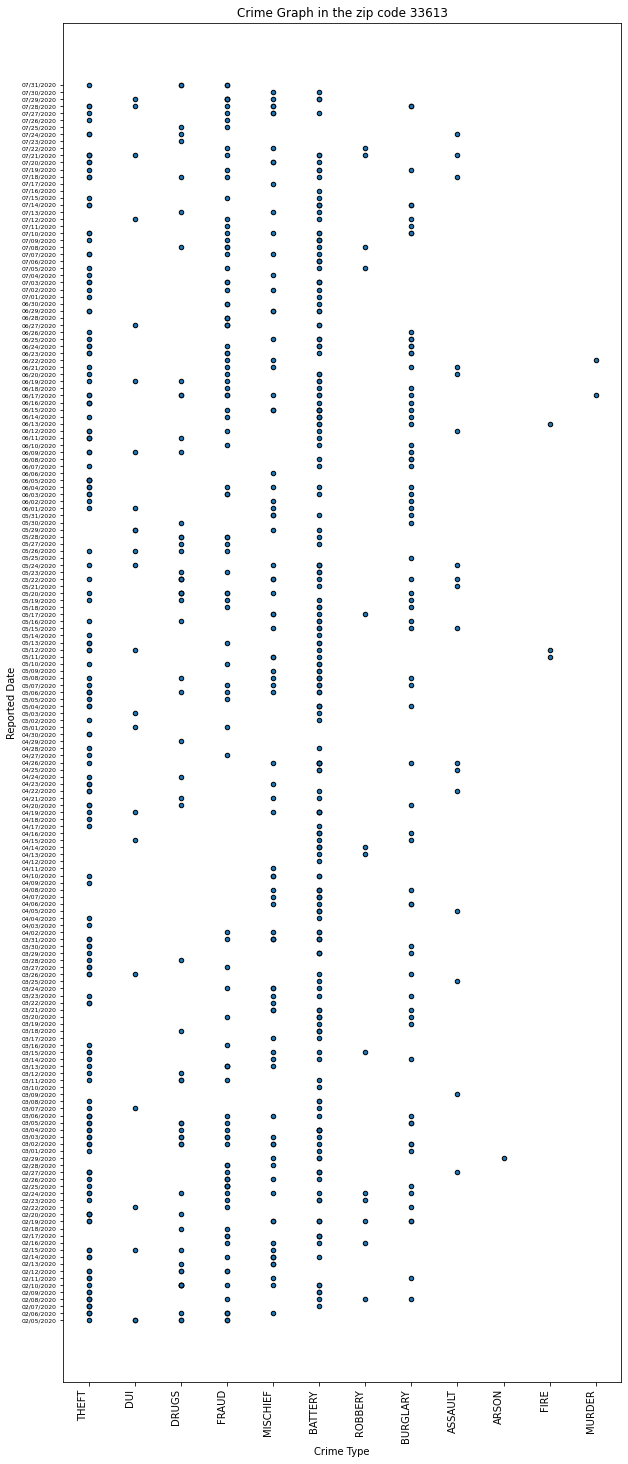

In [9]:
data_crime_no_traffic_df.plot(kind="scatter", x="Crime Type", y="Reported Date", figsize=(10,25),
                              facecolors="red", edgecolors="black", title="Crime Graph in the zip code 33613")
plt.xticks(rotation=90,  horizontalalignment='right', fontweight='light', fontsize='medium',)
plt.yticks(horizontalalignment='right', fontweight='light', fontsize=6)
plt.show()